# Thiết kế mạng nơ-ron tích chập xử lý hình ảnh chữ số viết tay

**Mạng nơ-ron tích chập** (*Convolutional Neural Network - CNN*) là một loại mạng nơ-ron sâu, thường được sử dụng trong xử lý hình ảnh và video.

Cấu trúc cơ bản của CNN bao gồm 3 lớp chính:

<font color='green'>1.   *Lớp Tích chập (Convolutional Layer)*</font>

* **Bộ lọc** (*Filter* hoặc *Kernel*): Một ma trận nhỏ được sử dụng để trích xuất đặc trưng từ hình ảnh thông qua việc "quét" qua hình ảnh.

* **Tích chập** (*Convolution*): Phép toán tích chập được thực hiện giữa bộ lọc và một vùng nhỏ của hình ảnh để tạo ra một bản đồ đặc trưng.

* **Bản đồ đặc trưng** (*Feature Map*): Kết quả của phép tích chập, mô tả thông tin về các đặc trưng được bộ lọc phát hiện.


<font color='green'>2.   *Lớp Gộp (Pooling Layer)*</font>

* Gộp (Pooling): Phép toán giảm kích thước không gian của bản đồ đặc trưng, giữ lại thông tin quan trọng và loại bỏ thông tin không cần thiết.

* Gộp tối đại (Max Pooling): Một phương pháp phổ biến của pooling, chọn giá trị lớn nhất từ một vùng nhỏ của bản đồ đặc trưng.

<font color='green'>3. *Lớp Kết nối Đầy đủ (Fully Connected Layer)*</font>

* Nơ-ron: Các đơn vị tính toán cơ bản của mạng.

* Hàm kích hoạt: Hàm chuyển đổi đầu ra của mỗi nơ-ron, ví dụ như hàm ReLU hoặc Sigmoid.

* Lớp đầu ra: Lớp cuối cùng của mạng, thường sử dụng hàm Softmax để phân loại.

Quy trình làm việc cơ bản của CNN trong bài toán phân loại hình ảnh:

* **Bước 1.** *Tiền xử lý:* Hình ảnh đầu vào thường được chuẩn hóa về kích thước và giá trị pixel.

* **Bước 2.** *Tích chập và Gộp:* Sử dụng các bộ lọc để trích xuất đặc trưng và giảm kích thước không gian của hình ảnh.

* **Bước 3.** *Học đặc trưng:* Tự động học các đặc trưng từ hình ảnh thông qua các lớp tích chập và gộp.

* **Bước 4.** *Phân loại:* Sử dụng các đặc trưng đã học để phân loại hình ảnh vào các lớp tương ứng.

* **Bước 5.** *Đánh giá và Tối ưu:* Sử dụng hàm mất mát để đánh giá hiệu suất của mô hình và thuật toán tối ưu (ví dụ: Gradient Descent) để cập nhật trọng số và cải thiện mô hình.

# Kiến trúc mạng nơ-ron tích chập

Trong mạng nơ-ron tích chập, các trạng thái ở mỗi lớp được tổ chức theo cấu trúc lưới không gian (*spatial grid*). Những mối quan hệ không gian này được kế thừa từ lớp này sang lớp kế tiếp vì mỗi giá trị đặc trưng dựa trên một khu vực không gian địa phương nhỏ ở lớp trước đó. Việc duy trì những mối quan hệ không gian này giữa các ô lưới là quan trọng, vì phép tích chập và biến đổi sang lớp tiếp theo phụ thuộc nặng nề vào những mối quan hệ này. 

Mỗi lớp trong mạng tích chập là một cấu trúc lưới $3$ chiều, có chiều cao, chiều rộng, và chiều sâu. Chiều sâu của một lớp trong mạng nơ-ron tích chập không nên bị nhầm lẫn với chiều sâu của chính mạng. Từ "chiều sâu" (khi được sử dụng trong ngữ cảnh của một lớp đơn lẻ) ám chỉ số lượng kênh ở mỗi lớp, chẳng hạn như số lượng kênh màu chính (ví dụ: xanh dương, xanh lá và đỏ) trong hình ảnh đầu vào hoặc số lượng bản đồ đặc trưng trong các lớp ẩn.

Dữ liệu đầu vào cho mạng nơ-ron tích chập được tổ chức thành một cấu trúc lưới 2 chiều, và giá trị của từng điểm lưới được gọi là các pixel. Do đó, mỗi pixel tương ứng với một vị trí không gian trong hình ảnh. Tuy nhiên, để mã hóa màu sắc chính xác của pixel, chúng ta cần một mảng giá trị đa chiều tại mỗi vị trí lưới. Trong lược đồ màu RGB, chúng ta có cường độ của ba màu chính, tương ứng với đỏ, xanh lá và xanh dương. Do đó, nếu kích thước không gian của một hình ảnh là $32 \times 32$ pixel và chiều sâu là $3$ (tương ứng với các kênh màu RGB), thì tổng số pixel trong hình ảnh là $32 \times 32 \times 3$. Kích thước hình ảnh cụ thể này khá phổ biến, và cũng xuất hiện trong một bộ dữ liệu thường được sử dụng  để đánh giá, được biết đến với tên CIFAR-10.

Việc biểu diễn lớp đầu vào bằng cấu trúc $3$ chiều này là tự nhiên vì $2$ chiều được dành cho mối quan hệ không gian và một chiều thứ $3$ được dành cho các tính chất độc lập dọc theo những kênh này. Ví dụ, cường độ của các màu chính là các tính chất độc lập trong lớp đầu tiên, được mã hóa bằng chiều thứ $3$. Trong các lớp ẩn, những tính chất độc lập này tương ứng với các loại hình dạng khác nhau được trích xuất từ các khu vực địa phương của hình ảnh.

Giả sử đầu vào của lớp $q$ có kích $L_q \times B_q \times d_q$ trong đó $L_q$ là chiều cao (height)  hoặc chiều dài (length), $B_q$ là chiều rộng (width) hoặc chiều ngang (breadth), $d_q$ là chiều sâu (depth). Đối với lớp đầu tiên (lớp đầu vào), những giá trị này được quyết định bởi bản chất của dữ liệu và quá trình tiền xử lý của nó. Chẳng hạn, bộ dữ liệu CIFAR-10 có $L_1 = 32$, $B_1 = 32$, $d_1 = 3$.

# Bản đồ đặc trưng (Feature Map)

Khi $q>1$ (tức không kể đến lớp đầu tiên), thì mỗi lưới không gian $2$ chiều nằm dọc theo chiều sâu được gọi là bản đồ đặc trưng (feature map) hay bản đồ kích hoạt (activation map). 
* Bản đồ đặc trưng là kết quả đầu ra của một lớp tích chập trong mạng nơ-ron tích chập. 
* Mỗi bản đồ đặc trưng được tạo ra bằng cách áp dụng một bộ lọc (filter hoặc kernel) lên hình ảnh đầu vào hoặc bản đồ đặc trưng từ lớp trước.
* Bản đồ đặc trưng đại diện cho nơi mà các đặc điểm (được bộ lọc đặc trưng hóa) xuất hiện trong hình ảnh đầu vào.

Các lớp sau trong CNN đều có cùng cấu trúc $3$ chiều như lớp đầu vào, nhưng ý nghĩa của các giá trị trong lưới này đã thay đổi:

* Chiều cao $L_q$ và chiều rộng $B_q$ của lưới đại diện cho không gian $2$ chiều của ảnh hoặc bản đồ đặc trưng.
* Chiều sâu của lưới không gian $d_q$ không còn đại diện cho các kênh màu như trong lớp đầu vào, mà nó đại diện cho số lượng các bản đồ đặc trưng khác nhau tại mỗi vị trí không gian. Giá trị của $d_q$ thường lớn hơn $3$ và dần tăng lên trong các lớp ẩn vì số lượng thuộc tính độc lập của một khu vực có liên quan đến bài toán phân loại thường khá đáng kể.

# Phép toán tích chập (Convolution)

Trong mạng nơ-ron tích chập, các tham số được tổ chức thành các bộ đơn vị cấu trúc $3$ chiều (bộ lọc, filter hay kernel). Bộ lọc thường là hình vuông về mặt kích thước không gian và thường nhỏ hơn nhiều so với những lớp mà bộ lọc được áp dụng. Ngược lại, độ sâu của bộ lọc luôn luôn giống như lớp mà nó được áp dụng. Giả sử kích thước bộ lọc trong lớp $q$ là $F_q \times F_q \times d_q$, trong đó $F_q$ thường nhỏ và là số lẻ.

Phép toán tích chập đặt bộ lọc tại mỗi vị trí có thể có trong hình ảnh (hoặc lớp ẩn) để bộ lọc trùng hợp hoàn toàn với hình ảnh, và thực hiện một tích vô hướng giữa các tham số $F_q \times F_q \times d_q$ trong bộ lọc với vùng địa phương của lưới phù hợp có cùng kích thường $F_q \times F_q \times d_q$. 

<p style="text-align:center;"><img src="CNN_01.png" width="600"></p>

Số lượng sắp xếp giữa bộ lọc và hình ảnh xác định chiều cao và chiều rộng không gian của lớp ẩn tiếp theo. Khi thực hiện các phép tích chập ở lớp thứ $q$, người ta có thể căn chỉnh bộ lọc tại $L_{q+1}=L_q-F_q+1$ vị trí dọc theo chiều cao và $B_{q+1}=B_q-F_q+1$ vị trí dọc theo chiều rộng của hình ảnh (không có một phần của bộ lọc "nhô ra" từ biên của hình ảnh). Điều này tạo ra tổng cộng $L_{q+1} \times B_{q+1}$ tích vô hướng có thể có, xác định kích thước của lớp ẩn tiếp theo. Lưu ý, có thể có nhiều bộ lọc và việc áp dụng mỗi một bộ lọc sẽ xác định một bản đồ đặc trưng dọc theo chiều sâu của lớp đầu ra. Thông thường, các lớp sau cùng có kích thước không gian nhỏ hơn, nhưng độ sâu lớn hơn về số lượng bản đồ đặc trưng. 

<p style="text-align:center;"><img src="CNN_02.png" width="500"></p>

Như được hiển thị trong hình minh họa trên, đặc trưng kết quả sẽ có kích hoạt cao tại mỗi vị trí mà một mép ngang được nhìn thấy. Một mép hoàn toàn dọc sẽ cho kích hoạt bằng không, trong khi một mép nghiêng có thể cho kích hoạt ở giữa. Do đó, việc trượt bộ lọc ở mọi nơi trên hình ảnh sẽ ngay lập tức phát hiện ra một số đường viền chính của hình ảnh trong một bản đồ đặc trưng duy nhất của khối lượng đầu ra. Nhiều bộ lọc được sử dụng để tạo ra một khối lượng đầu ra với nhiều hơn một bản đồ đặc trưng. Ví dụ, một bộ lọc khác có thể được dùng để tạo ra một bản đồ đặc trưng của kích hoạt mép dọc.

Bây giờ, ta sẽ định nghĩa phép toán tích chập. Bộ lọc thứ $p$ trong lớp thứ $q$ được biểu diễn bởi tensor $3$ chiều $W = \left[w^{(p,q)}_{ijk}\right]$. Các chỉ số $i$, $j$, $k$ chỉ vị trí dọc theo chiều cao, chiều rộng, và chiều sâu của bộ lọc. Các bản đồ đặc trưng trong lớp thứ $q$ được biểu diễn bởi tensor $3$ chiều $H^{(q)} = \left[h^{(q)}_{ijk}\right]$, trong trường hợp $q=1$ tương ứng với ký hiệu $H^{(1)}$ đơn giản chỉ lớp đầu vào (không ẩn). Khi đó, phép toán tích chập từ lớp thứ $q$ đến lớp thứ $q+1$ thông qua bộ lọc thứ $p$ là:
\begin{align*}
h^{(q+1)}_{ijp} = \sum_{r=1}^{F_q} \sum_{s=1}^{F_q} \sum_{k=1}^{d_q} w^{(p,q)}_{rsk}h^{(q)}_{i+r-1,j+s-1,k}
\end{align*}
với mọi $i \in \{1,2,\ldots,L_q-F_q+1\}$, $j \in \{1,2,\ldots,B_q-F_q+1\}$ và $p \in \{1,2,\ldots,d_{p+1}\}$.

<p style="text-align:center;"><img src="CNN_03.png" width="400"></p>

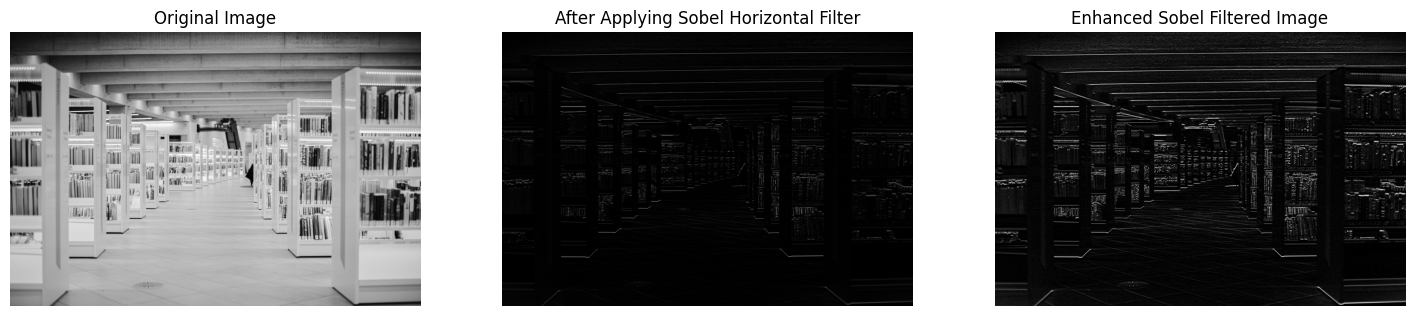

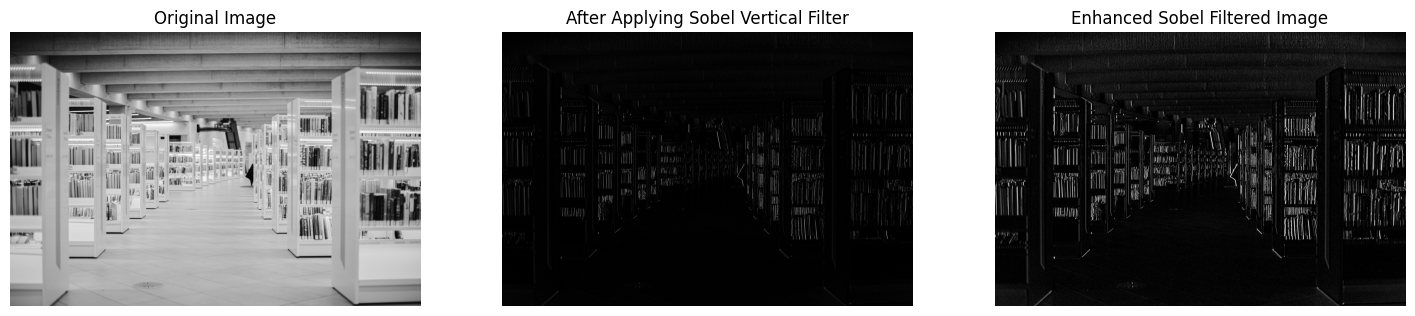

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tải hình ảnh
image = cv2.imread('C:\\Users\\admin\\Downloads\\library.jpg', cv2.IMREAD_GRAYSCALE)

# Định nghĩa bộ lọc ngang Sobel
horizontal_filter = np.array([[1, 2, 1],
                              [0, 0, 0],
                              [-1, -2, -1]])

# Thực hiện tích chập
convolved_image = cv2.filter2D(image, -1, horizontal_filter)

# Tăng tương phản và độ sáng
enhanced_image = cv2.convertScaleAbs(convolved_image, alpha=3, beta=50)

# Hiển thị hình ảnh
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(convolved_image, cmap='gray')
axs[1].set_title('After Applying Sobel Horizontal Filter')
axs[1].axis('off')

axs[2].imshow(enhanced_image, cmap='gray')
axs[2].set_title('Enhanced Sobel Filtered Image')
axs[2].axis('off')

plt.show()

# Định nghĩa bộ lọc dọc Sobel
vertical_filter = np.array([[1, 0, -1],
                            [2, 0, -2],
                            [1, 0, -1]])

# Thực hiện tích chập
convolved_image = cv2.filter2D(image, -1, vertical_filter)

# Tăng tương phản và độ sáng
enhanced_image = cv2.convertScaleAbs(convolved_image, alpha=3, beta=50)

# Hiển thị hình ảnh
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(convolved_image, cmap='gray')
axs[1].set_title('After Applying Sobel Vertical Filter')
axs[1].axis('off')

axs[2].imshow(enhanced_image, cmap='gray')
axs[2].set_title('Enhanced Sobel Filtered Image')
axs[2].axis('off')

plt.show()

# Đệm (Padding)

Một quan sát là phép toán tích chập làm giảm kích thước của lớp $q+1$ so với lớp $q$. Việc giảm kích thước này nói chung không được mong muốn, bởi vì nó có xu hướng mất một số thông tin dọc theo các biên của hình ảnh (hoặc của bản đồ đặc trưng, trong trường hợp các lớp ẩn). Vấn đề này có thể được giải quyết bằng cách sử dụng padding (đệm). Một số dạng đệm có thể kể đến:

* **Valid Padding** (Không sử dụng đệm): Khi không sử dụng đệm, kích thước của bản đồ đặc trưng đầu ra sau mỗi phép tích chập giảm đi và thông tin ở các mép của hình ảnh hoặc bản đồ đặc trưng có thể bị mất mát hoặc không được đại diện đủ. Điều này có thể làm giảm độ chính xác của mô hình, đặc biệt là khi thông tin quan trọng nằm ở mép của hình ảnh.

* **Half-Padding** (Same Padding): Để giữ cho kích thước không gian của feature map không đổi sau phép tích chập, có thể sử dụng nửa đệm, là cách mà số lượng pixel được thêm vào mép của hình ảnh là $\frac{F_q-1}{2}$, với $F_q$ là kích thước không gian của filter. Điều này đảm bảo rằng hình ảnh đầu ra sau phép tích chập có cùng kích thước không gian với hình ảnh đầu vào. Ví dụ như hình dưới đây:

<p style="text-align:center;"><img src="CNN_04.png" width="700"></p>

* **Full-Padding** (Đệm toàn phần): Trong trường hợp đệm toàn phần, hình ảnh được padding với $F_q-1$ pixel trên mỗi mép, làm tăng kích thước không gian của bản đồ đặc trưng sau phép tích chập. Full-padding đôi khi được sử dụng trong các tình huống cụ thể như tính toán tích chập ngược, mà có thể xuất hiện trong các thuật toán Lan truyền ngược hoặc autoencoders cho CNNs.

# Bước nhảy (Strides)

Có những cách khác mà tích chập có thể giảm kích thước không gian của hình ảnh (hoặc lớp ẩn). Phương pháp trước đó thực hiện tích chập ở mỗi vị trí trong không gian của bản đồ đặc trưng. Tuy nhiên, không nhất thiết phải thực hiện tích chập ở mỗi vị trí không gian trong lớp. Có thể giảm độ tinh tế của tích chập bằng cách sử dụng khái niệm về bước nhảy (strides). Mô tả trước đây tương ứng với trường hợp khi sử dụng bước nhảy là $1$. Khi sử dụng bước nhảy $S_q$ trong lớp thứ $q$, tích chập được thực hiện ở các vị trí $1$, $S_q+1$, $2S_q+1$, $\ldots$ dọc theo cả hai chiều không gian của lớp. Kích thước không gian của đầu ra sau khi thực hiện tích chập dạng này có chiều cao $\frac{L_q-F_q}{S_q}+1$ và chiều rộng $\frac{B_q-F_q}{S_q}+1$. Việc sử dụng bước nhảy $1$ là phổ biến nhất, mặc dù đôi khi cũng sử dụng bước nhảy $2$. Việc sử dụng bước nhảy lớn hơn $2$ là hiếm khi xảy ra trong các tình huống thông thường. 

Bước nhảy lớn có thể hữu ích trong các tình huống bị giới hạn bộ nhớ hoặc để giảm overfitting nếu độ phân giải không gian không cần thiết quá cao. Bước nhảy có tác dụng tăng cường nhanh chóng trường nhận biết của từng đặc trưng trong lớp ẩn, trong khi giảm kích thước không gian của toàn bộ lớp. Một trường nhận biết tăng cường là hữu ích để nắm bắt một đặc trưng phức tạp trong một khu vực không gian lớn hơn của hình ảnh.

# ReLU (Rectified Linear Unit)

Phép toán tích chập được xen kẽ với các phép toán pooling và $\text{ReLU}$. Kích hoạt $\text{ReLU}$ không khác nhiều so với cách nó được áp dụng trong mạng nơ-ron truyền thống. Đối với từng giá trị trong $L_q\times B_q\times d_q$ giá trị của một lớp, hàm kích hoạt ReLU được áp dụng để tạo ra $L_q\times B_q\times d_q$ giá trị đã qua ngưỡng. Những giá trị này sau đó được chuyển tiếp đến lớp tiếp theo. Do đó, việc áp dụng $\text{ReLU}$ không thay đổi kích thước của một lớp vì nó là một ánh xạ một-với-một đơn giản của các giá trị kích hoạt. Trong các mạng nơ-ron truyền thống, hàm kích hoạt được kết hợp với một biến đổi tuyến tính với ma trận trọng số để tạo ra lớp kích hoạt tiếp theo. Tương tự như vậy, $\text{ReLU}$ thường theo sau một hoạt động tích chập (điều này tương đương với biến đổi tuyến tính trong các mạng nơ-ron truyền thống)

# Gộp (Pooling)

Phép toán gộp hoạt động trên các vùng lưới nhỏ có kích thước $P_q\times P_q$ trong mỗi lớp, và tạo ra một lớp khác với chiều sâu giống hệt (khác với các bộ lọc). Đối với mỗi vùng vuông có kích thước $P_q \times P_q$ của một trong số $d_q$ bản đồ đặc trưng, giá trị lớn nhất trong số những giá trị này được trả lại. Phương pháp này được gọi là max-pooling (gộp tối đại). 

Nếu sử dụng bước nhảy là $1$, sau khi gộp sẽ tạo ra một lớp mới có kích thước $(L_q-P_q+1)\times(B_q-P_q+1)\times d_q$. Tuy nhiên, phổ biến hơn là sử dụng bước nhảy $S_q>1$ trong pooling. Với trường hợp như vậy, chiều dài của lớp mới sẽ là $\frac{L_q-P_q}{S_q}+1$ và chiều rộng là $\frac{B_q-P_q}{S_q}+1$, chiều sâu vẫn là $d_q$. Do đó, pooling giảm đáng kể kích thước không gian của mỗi bản đồ kích hoạt.

Khác với các phép toán tích chập, phép gộp được thực hiện ở cấp độ của từng bản đồ đặc trưng. Trong khi một phép toán tích chập sử dụng đồng thời tất cả $d_q$ bản đồ đặc trưng kết hợp với một bộ lọc để tạo ra một giá trị đặc trưng đơn, còn gộp hoạt động độc lập trên mỗi bản đồ đặc trưng để tạo ra một bản đồ đặc trưng khác. Do đó, phép toán pooling không thay đổi số lượng bản đồ đặc trưng. Nói cách khác, chiều sâu của lớp được tạo ra bằng cách sử dụng pooling giống với chiều sâu của lớp mà phép toán pooling được thực hiện. Hình minh họa sau sử dụng phương pháp gộp tối đại.

<p style="text-align:center;"><img src="CNN_05.png" width="500"></p>

Có các loại pooling khác (như average-pooling) có thể được sử dụng nhưng hiếm khi được sử dụng. Trong mạng tích chập đầu tiên, được gọi là LeNet-5, một biến thể của average pooling đã được sử dụng và được gọi là subsampling. Nói chung, max-pooling vẫn phổ biến hơn average pooling. Các lớp max-pooling được xen kẽ với các lớp tích chập/ReLU, mặc dù chúng sẽ xuất hiện ít hơn trong các kiến trúc sâu. Điều này là bởi vì phép gộp giảm đáng kể kích thước không gian của bản đồ đặc trưng, và chỉ cần một số ít các phép toán gộp để giảm bản đồ không gian xuống kích thước hằng số nhỏ.

Việc sử dụng phép gộp với kích thước $2\times2$ và bước nhảy $2$ là phổ biến, khi muốn giảm kích thước không gian của các bản đồ kích hoạt. Pooling tạo ra sự không đổi (một phần) đối với việc dịch chuyển bởi vì việc dịch chuyển hình ảnh nhẹ nhàng không làm thay đổi đáng kể bản đồ kích hoạt. Tính chất này được gọi là *bất biến đối với phép dịch*. Ý tưởng ở đây là, những hình ảnh tương tự nhau thường có những hình dạng đặc trưng đặt ở những vị trí tương đối khác nhau trong chúng. Tính chất bất biến đối với phép dịch chuyển giúp mô hình có khả năng phân loại những hình ảnh đó một cách tương tự, ngay cả khi vị trí của hình dạng đặc trưng trong chúng thay đổi. Ví dụ, một mô hình nên có khả năng phân loại một con chim là một con chim, không phụ thuộc vào vị trí của con chim đó trong hình ảnh.

Một mục đích quan trọng khác của phép gộp là nó làm tăng kích thước của trường nhận biết (receptive field) trong khi giảm kích thước không gian của lớp do sử dụng các bước nhảy lớn hơn $1$. Các kích thước lớn hơn của trường nhận biết cần thiết để có khả năng nắm bắt các vùng lớn hơn của hình ảnh trong một đặc trưng phức tạp ở các lớp sau. Hầu hết các giảm kích thước nhanh chóng trong kích thước không gian của các lớp (và tăng tương ứng trong trường nhận biết của các đặc trưng) được gây ra bởi các phép toán pooling. Các phép toán tích chập chỉ làm tăng nhẹ trường nhận biết trừ khi bước nhảy lớn hơn $1$. Trong những năm gần đây, đã có đề xuất rằng pooling không phải luôn là cần thiết. Người ta có thể thiết kế một mạng với chỉ các phép toán tích chập và $\text{ReLU}$, và đạt được sự mở rộng của trường nhận biết bằng cách sử dụng các bước nhảy lớn hơn trong các phép toán tích chập. Do đó, có một xu hướng mới xuất hiện trong những năm gần đây để loại bỏ hoàn toàn các lớp max-pooling. Tuy nhiên, xu hướng này chưa được thiết lập và xác nhận hoàn toàn. Có vẻ như có ít nhất một số lập luận ủng hộ max-pooling. Max-pooling giới thiệu tính phi tuyến và một lượng lớn bất biến dịch chuyển, so với các phép toán tích chập có bước nhảy. Mặc dù tính phi tuyến có thể đạt được với hàm kích hoạt $\text{ReLU}$, điểm chính là hiệu ứng của max-pooling không thể được tái tạo chính xác bằng các phép toán tích chập có bước nhảy. Ít nhất, hai phép toán không hoàn toàn có thể thay thế cho nhau.

# Lớp kết nối đầy đủ (Fully Connected Layer)

